In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/cifar-10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar-10/cifar-10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar-10/cifar-10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar-10/cifar-10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar-10/cifar-10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar-10/cifar-10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar-10/cifar-10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar-10/cifar-10-python/cifar-10-batches-py/readme.html


In [2]:
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes') 
    return data_dict

file = '/kaggle/input/cifar-10/cifar-10-python/cifar-10-batches-py/data_batch_1'

# Load data
data_batch_1 = unpickle(file)


print(data_batch_1.keys()) 



dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [3]:
type(data_batch_1)


dict

In [4]:
len(data_batch_1)


4

In [5]:
data_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [6]:
data_batch_1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [7]:
data_batch_1[b'data'].shape

(10000, 3072)

In [8]:
data_batch_1[b'data'][0]

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)

In [9]:
data_batch_1[b'data'][0].shape

(3072,)

In [10]:
image = data_batch_1[b'data'][0]
image = image.reshape(3,32,32)
image

array([[[ 59,  43,  50, ..., 158, 152, 148],
        [ 16,   0,  18, ..., 123, 119, 122],
        [ 25,  16,  49, ..., 118, 120, 109],
        ...,
        [208, 201, 198, ..., 160,  56,  53],
        [180, 173, 186, ..., 184,  97,  83],
        [177, 168, 179, ..., 216, 151, 123]],

       [[ 62,  46,  48, ..., 132, 125, 124],
        [ 20,   0,   8, ...,  88,  83,  87],
        [ 24,   7,  27, ...,  84,  84,  73],
        ...,
        [170, 153, 161, ..., 133,  31,  34],
        [139, 123, 144, ..., 148,  62,  53],
        [144, 129, 142, ..., 184, 118,  92]],

       [[ 63,  45,  43, ..., 108, 102, 103],
        [ 20,   0,   0, ...,  55,  50,  57],
        [ 21,   0,   8, ...,  50,  50,  42],
        ...,
        [ 96,  34,  26, ...,  70,   7,  20],
        [ 96,  42,  30, ...,  94,  34,  34],
        [116,  94,  87, ..., 140,  84,  72]]], dtype=uint8)

In [11]:
image = image.transpose(1,2,0)
print(image.shape)
image

(32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

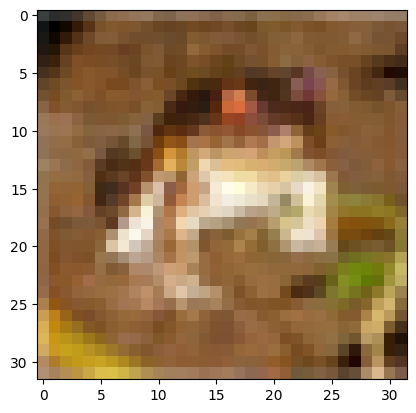

In [12]:
import matplotlib.pyplot as plt
plt.imshow(image)

(10000, 32, 32, 3)


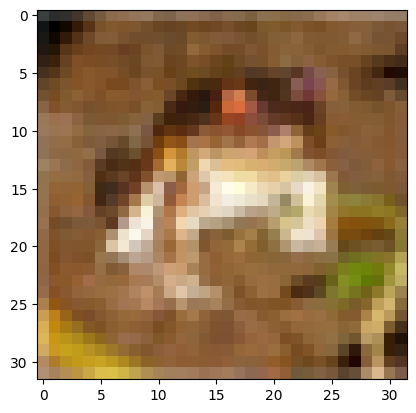

In [13]:
data = data_batch_1[b'data']
data = data.reshape(len(data),3,32,32).transpose(0,2,3,1)
print(data.shape)
plt.imshow(data[0])

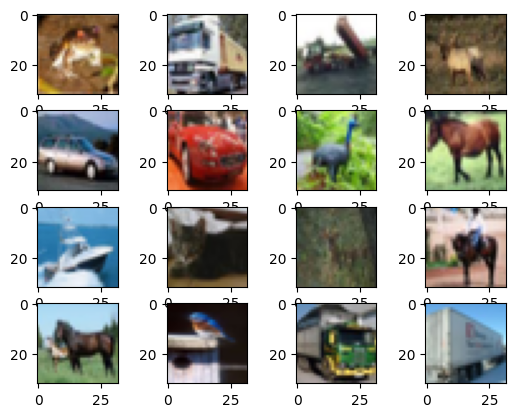

In [14]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[i])
plt.show()

In [15]:
X_train = data_batch_1[b'data']  # Image data
y_train = data_batch_1[b'labels']  # Labels

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [17]:
X_train = X_train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  
X_train = X_train.astype('float32') / 255.0 
y_train = to_categorical(y_train, num_classes=10)  

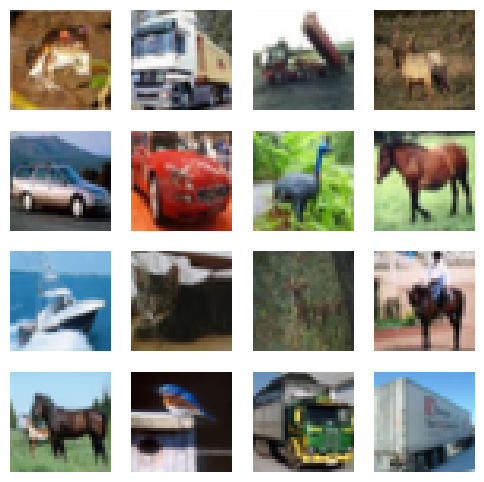

In [18]:
data = X_train  
plt.figure(figsize=(6, 6))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
plt.show()

In [19]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.1718 - loss: 2.1946 - val_accuracy: 0.3760 - val_loss: 1.7107
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.3678 - loss: 1.7010 - val_accuracy: 0.4090 - val_loss: 1.5395
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.4586 - loss: 1.4997 - val_accuracy: 0.4960 - val_loss: 1.3152
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.5016 - loss: 1.3425 - val_accuracy: 0.5260 - val_loss: 1.2897
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.5472 - loss: 1.2414 - val_accuracy: 0.5620 - val_loss: 1.1902
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.5806 - loss: 1.1568 - val_accuracy: 0.6130 - val_loss: 1.0896
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.6234 - loss: 1.0658 - val_accuracy: 0.6090 - val_loss: 1.1032
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.6455 - loss: 0.9761 - 

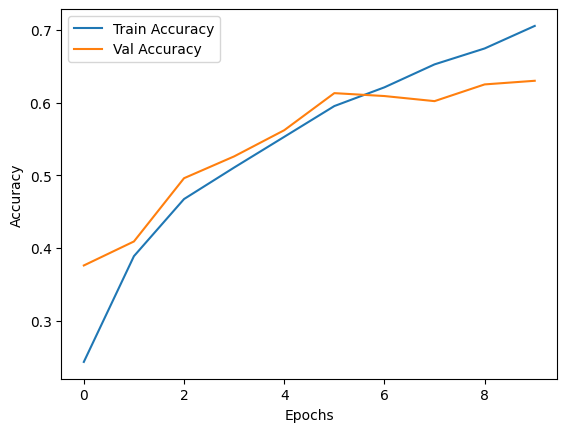

In [22]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
test_file = '/kaggle/input/cifar-10/cifar-10-python/cifar-10-batches-py/data_batch_1'
test_batch = unpickle(test_file)


In [24]:
X_test = test_batch[b'data']
y_test = test_batch[b'labels']

In [25]:
X_test = X_test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1) 
X_test = X_test.astype('float32') / 255.0  # Normalize
y_test = to_categorical(y_test, num_classes=10)

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 4s - 12ms/step - accuracy: 0.7627 - loss: 0.6914
Test Accuracy: 0.7627


In [27]:
import numpy as np

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [28]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


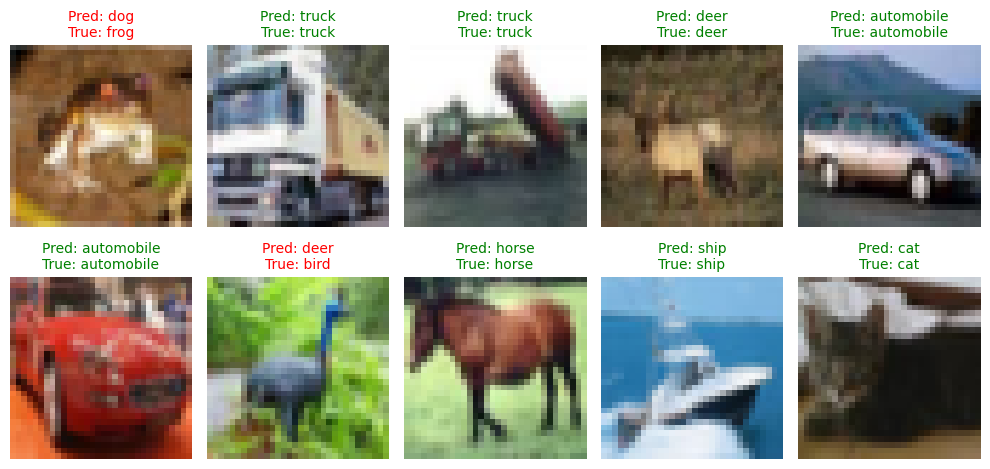

In [29]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    true_label = class_names[true_labels[i]]
    predicted_label = class_names[predicted_labels[i]]
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", fontsize=10, 
              color="green" if true_label == predicted_label else "red")

plt.tight_layout()
plt.show()